In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, root_mean_squared_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV, cross_validate
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('dataset.csv')
df.drop_duplicates(inplace=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
# Définir les tranches de BMI
bins = [0, 18.5, 24.9, 29.9, 40, 100]  # Tranches de BMI
labels = ['Sous-poids', 'Poids normal', 'Surpoids', 'Obésité', 'Obésité sévère']

# Ajouter une nouvelle colonne dans le DataFrame pour les tranches de BMI
df['BMI_category'] = pd.cut(df['bmi'], bins=bins, labels=labels, right=False)

In [ ]:
# # Définir les tranches d'ages
# bins = [18, 36, 45, 55, 65]  # Tranches de BMI
# labels = ['18-35', '36-45', '46-55', 'plus de 55 ans']

# # Ajouter une nouvelle colonne dans le DataFrame pour les tranches de BMI
# df['age_categories'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [16]:
#Label encoder pour le sexe et si les usagers sont fumeurs

labe_encod = LabelEncoder()
df['sex_encode']= labe_encod.fit_transform(df['sex'])
df['smoker_encode']= labe_encod.fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,charges,BMI_category,sex_encode,smoker_encode
0,19,female,27.900,0,yes,southwest,16884.92400,Surpoids,0,1
1,18,male,33.770,1,no,southeast,1725.55230,Obésité,1,0
2,28,male,33.000,3,no,southeast,4449.46200,Obésité,1,0
3,33,male,22.705,0,no,northwest,21984.47061,Poids normal,1,0
4,32,male,28.880,0,no,northwest,3866.85520,Surpoids,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obésité,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,Obésité,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,Obésité,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,Surpoids,0,0


In [12]:
# encodage par région et par bmi category

df_reg_encod = pd.get_dummies(df['region'])
df_reg_encod.replace(False, 0, inplace=True)
df_reg_encod.replace(True, 1, inplace=True)
df_reg_encod

df_bmi_encod = pd.get_dummies(df['BMI_category'])
df_bmi_encod.replace(False, 0, inplace=True)
df_bmi_encod.replace(True, 1, inplace=True)
df_bmi_encod

/tmp/ipykernel_18242/2260671963.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_reg_encod.replace(True, 1, inplace=True)
/tmp/ipykernel_18242/2260671963.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bmi_encod.replace(True, 1, inplace=True)


,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
1333,0,0,0,1,0
1334,0,0,0,1,0
1335,0,0,0,1,0
1336,0,0,1,0,0


In [20]:
#concatener les df encodé avec le df
# df_2 = pd.concat([df,df_reg_encod], axis=1)
df_2 = pd.concat([df,df_reg_encod,df_bmi_encod], axis=1)
#supprimer les colonnes qui ont été encodés

# df_2.drop(columns=['sex','smoker','region','BMI_category','age_categories'],inplace=True)
df_2.drop(columns=['sex','smoker','region','BMI_category'],inplace=True)
df_2

,age,bmi,children,charges,sex_encode,smoker_encode,northeast,northwest,southeast,southwest,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,19,27.900,0,16884.92400,0,1,0,0,0,1,0,0,1,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1,0,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0,0,1,0,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0,0,0,0,1,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0,0,0,0,1,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1,0,0,1,0,0


In [19]:
df_2

,age,bmi,children,charges,northeast,northwest,southeast,southwest,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,19,27.900,0,16884.92400,0,0,0,1,0,0,1,0,0
1,18,33.770,1,1725.55230,0,0,1,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,1,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,0,0,1,0,0,0
4,32,28.880,0,3866.85520,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,0,0,0,0,1,0
1334,18,31.920,0,2205.98080,1,0,0,0,0,0,0,1,0
1335,18,36.850,0,1629.83350,0,0,1,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,1,0,0,1,0,0


In [21]:
line_reg = LinearRegression()
X_train, X_test, y_train, y_test =train_test_split(df_2.drop(['charges', 'bmi'], axis = 1), df_2['charges'],random_state=42, test_size=0.2, stratify=df_2[['smoker_encode']])
# line_reg.fit(df_2.drop(['charges', 'children', 'northeast','northwest','southeast','southwest'], axis=1), df_2['charges'])
line_reg.fit(X_train,y_train)
line_reg.coef_

array([  256.46554565,   621.32851028,  -186.02776705, 23826.84255972,
         592.96922051,   127.79569494,  -298.97803414,  -421.78688131,
       -2323.7686899 , -2239.7796685 , -1154.1724631 ,  2642.83136378,
        3074.88945772])

In [22]:
# line_reg.score(df_2.drop(['charges', 'children', 'northeast','northwest','southeast','southwest'], axis=1), df_2['charges'])
line_reg.score(X_train,y_train)

0.7383778253466708

In [24]:
from sklearn.metrics import mean_squared_error,r2_score

y_pred = line_reg.predict(X_test)

print(f"Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.5f}")

with open('modele de regresion lineaire.pkl', 'wb') as f:
    pickle.dump(line_reg, f)

Mean squared error: 5174.05
Coefficient of determination: 0.81429


### regression linéaire sans les fumeurs

In [ ]:
# test des resultats si on enleve les fumeurs

df_sans_fumeurs = df_2[df['smoker_encode'] == 0].reset_index()
df_sans_fumeurs.drop('index', axis=1, inplace=True)

In [ ]:
line_reg = LinearRegression()
X_train, X_test, y_train, y_test =train_test_split(df_2.drop('charges', axis = 1), df_2['charges'],random_state=42, test_size=0.2, stratify=df_2[['smoker_encode']])
# line_reg.fit(df_2.drop(['charges', 'children', 'northeast','northwest','southeast','southwest'], axis=1), df_2['charges'])
line_reg.fit(X_train,y_train)
line_reg.coef_
y_pred = line_reg.predict(X_test)

print(f"Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.5f}")



NameError: name 'df_2' is not defined

Dans un modèle sans fumeur tous paramètres n'expliquent pas tous 

### regression linéaire avec la seule variable explicative des fumeurs

In [ ]:
# test des resultats avec la seule variable explicative des fumeurs
df_smoke = df_2[['charges', 'smoker_encode']]
df_smoke

,charges,smoker_encode
0,16884.92400,1
1,1725.55230,0
2,4449.46200,0
3,21984.47061,0
4,3866.85520,0
...,...,...
1333,10600.54830,0
1334,2205.98080,0
1335,1629.83350,0
1336,2007.94500,0


In [ ]:
line_reg = LinearRegression()
X_train, X_test, y_train, y_test =train_test_split(df_2.drop('charges', axis = 1), df_2['charges'],random_state=42, test_size=0.2, stratify=df_2[['smoker_encode']])# line_reg.fit(df_2.drop(['charges', 'children', 'northeast','northwest','southeast','southwest'], axis=1), df_2['charges'])
line_reg.fit(X_train,y_train)
line_reg.coef_
y_pred = line_reg.predict(X_test)

print(f"Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.5f}")

Mean squared error: 7343.52
Coefficient of determination: 0.64966


avec la variable seule si l'assuré est fumeur ou non donne un modèle moins performant donc avec une combinaison de variable différent le modèle est meilleur

### test d'un modele sans les villes

In [ ]:
df_sans_ville = df_2.drop(['children', 'northeast','northwest','southeast','southwest'], axis=1)
df_sans_ville

,age,bmi,charges,sex_encode,smoker_encode,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,19,27.900,16884.92400,0,1,0,0,1,0,0
1,18,33.770,1725.55230,1,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,1,0,0,0
4,32,28.880,3866.85520,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,0,0,1,0
1334,18,31.920,2205.98080,0,0,0,0,0,1,0
1335,18,36.850,1629.83350,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,1,0,0


In [ ]:
line_reg = LinearRegression()
X_train, X_test, y_train, y_test =train_test_split(df_2.drop('charges', axis = 1), df_2['charges'],random_state=42, test_size=0.2, stratify=df_2[['smoker_encode']])line_reg.fit(X_train,y_train)
line_reg.coef_
y_pred = line_reg.predict(X_test)

print(f"Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.5f}")


Mean squared error: 6056.02
Coefficient of determination: 0.76174


le modèle est sensiblement meilleur avec les villes

### séparation des villes en est et ouest

In [28]:
df_2_est_ouest = df_2.copy()
df_2_est_ouest['ouest'] = df['region'].apply(lambda x: 1 if 'west' in str(x) else 0)
df_2_est_ouest.drop(['northeast','northwest','southeast','southwest'], axis = 1, inplace = True)
df_2_est_ouest

,age,bmi,children,charges,sex_encode,smoker_encode,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère,ouest
0,19,27.900,0,16884.92400,0,1,0,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,0,1,0,0
2,28,33.000,3,4449.46200,1,0,0,0,0,1,0,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0,0,1
4,32,28.880,0,3866.85520,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,0,0,1,0,1
1334,18,31.920,0,2205.98080,0,0,0,0,0,1,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,0,1,0,0,1


In [ ]:
line_reg = LinearRegression()
X_train, X_test, y_train, y_test =train_test_split(df_2.drop('charges', axis = 1), df_2['charges'],random_state=42, test_size=0.2, stratify=df_2[['smoker_encode']])
line_reg.fit(X_train,y_train)
line_reg.coef_
y_pred = line_reg.predict(X_test)

print(f"Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.5f}")

Mean squared error: 6057.33
Coefficient of determination: 0.80033


### LASSO, en gardant le df_est_ouest qui a donné le meilleur modèle

In [ ]:
#MISE EN FORME pour garder les valeurs numériques et centré reduire sur une pipeline
model = make_pipeline(StandardScaler(), PolynomialFeatures(interaction_only= True), Lasso(alpha=50))

X_train, X_test, y_train, y_test =train_test_split(df_2.drop(['charges','bmi'], axis = 1), df_2['charges'],random_state=42, test_size=0.15, stratify=df_2[['smoker_encode']])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f"Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.5f}")

Mean squared error: 5352.73
Coefficient of determination: 0.80229


In [ ]:
df_2

,age,bmi,children,charges,sex_encode,smoker_encode,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,0,1
1,18,33.770,1,1725.55230,1,0,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,0,1,0
3,33,22.705,0,21984.47061,1,0,0,1,0,0
4,32,28.880,0,3866.85520,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,1,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,0,1


### regression de Lasso, avec le df avec toutes les données

### ====================================================================================================================================

In [29]:
#{'lasso__alpha': np.float64(34.0)} Résultat du grid search qui serait la valeur normalement admise comme
# hyperparamètre alpha

model = make_pipeline(StandardScaler(),
                       PolynomialFeatures(interaction_only=True), Lasso(alpha=70, random_state=42))

X_train, X_test, y_train, y_test =train_test_split(df_2.drop(['charges', 'bmi'], axis = 1), df_2['charges'],random_state=42, test_size=0.15, stratify=df_2[['smoker_encode']])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f"Root Mean squared error: {root_mean_squared_error(y_test, y_pred):.10f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.3f}")
print(model.score(X_test,y_test))

with open('modele de regression de Lasso.pkl', 'wb') as f:
    pickle.dump(model, f)

Root Mean squared error: 3560.2103893718
Coefficient of determination: 0.913
0.9125347338994461


### ===========================================================================================================

In [34]:
model = make_pipeline(StandardScaler(),
                       PolynomialFeatures(interaction_only=True), Ridge(alpha=12.66, random_state= 42))

X_train, X_test, y_train, y_test =train_test_split(df_2.drop(['charges','bmi'], axis = 1), df_2['charges'],random_state=42, test_size=0.2, stratify=df_2[['smoker_encode']])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f"Root Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.5f}")


with open('modele de regression de Ridge.pkl', 'wb') as f:
    pickle.dump(model, f)

Root Mean squared error: 3752.49
Coefficient of determination: 0.90232


### ============================
## Meilleur modele de regression Ridge

In [35]:
model = make_pipeline(StandardScaler(), PolynomialFeatures(2), Ridge(alpha=70, random_state=42))

X_train, X_test, y_train, y_test =train_test_split(df_2_est_ouest.drop(['charges', 'bmi'], axis = 1), df_2_est_ouest['charges'],random_state=42, test_size=0.15, stratify=df_2[['smoker_encode']])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f"root Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.5f}")

root Mean squared error: 3602.99
Coefficient of determination: 0.91042


### ============================

In [ ]:
test_personne = pd.DataFrame([[50,50,0,1,1,0,0,1,0,0,1,0,1,0]], columns=df_2.drop('charges',axis = 1).columns)
test_personne

,age,bmi,children,sex_encode,smoker_encode,northeast,northwest,southeast,southwest,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,50,50,0,1,1,0,0,1,0,0,1,0,1,0


In [ ]:

model.predict(test_personne)

array([46123.17943087])

In [ ]:
model = make_pipeline(StandardScaler(), PolynomialFeatures(interaction_only=True), ElasticNet(alpha=89, l1_ratio=1, random_state=42))

X_train, X_test, y_train, y_test =train_test_split(df_2_est_ouest.drop(['charges','bmi'], axis = 1), df_2_est_ouest['charges'],random_state=42, test_size=0.15, stratify=df_2[['smoker_encode']])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f"root Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.5f}")

root Mean squared error: 3558.54
Coefficient of determination: 0.91262


### =====================================================================

## Meilleur modele ElasticNet

In [36]:
model = make_pipeline(StandardScaler(), PolynomialFeatures(2, interaction_only= True), ElasticNet(alpha=89, l1_ratio=1, random_state=42))

X_train, X_test, y_train, y_test =train_test_split(df_2.drop(['charges','bmi'], axis = 1), df_2['charges'],random_state=42, test_size=0.15, stratify=df_2[['smoker_encode']])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print(f"root Mean squared error: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.5f}")
print(f"Coefficient of determination: {model.score(X_test,y_test)}")


with open('modele de regression ElasticNet.pkl', 'wb') as f:
    pickle.dump(model, f)

root Mean squared error: 3556.09
Coefficient of determination: 0.91274
Coefficient of determination: 0.9127372323744508


### =====================================================================

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),  # Transformation polynomiale
    ('lasso', Lasso())  # Modèle Lasso
])

param_grid = {
        "lasso__alpha": np.linspace(1, 100, 10), 
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="r2",
)

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)
print(grid_search.cv_results_["param_lasso__alpha"])

c:\Users\DELL 7490\Desktop\Projet data\Assur_aimant\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.679e+09, tolerance: 1.260e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL 7490\Desktop\Projet data\Assur_aimant\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.208e+09, tolerance: 1.289e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL 7490\Desktop\Projet data\Assur_aimant\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

{'lasso__alpha': np.float64(23.0)}
[1.0 12.0 23.0 34.0 45.0 56.0 67.0 78.0 89.0 100.0]


In [ ]:
results = grid_search.cv_results_
alphas = results["param_lasso__alpha"].data
mean_scores = results["mean_test_score"]

# LE GRAPHIQUE SOUS CETTE FORME N'EST UTILE DANS CE CAS CAR LE R2 ET LE ALPHA CHANGENT SELON PLUSIEURS PARAMETRES
plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_scores, label="R² moyen", color="blue")

#Ajouter des annotations

plt.axvline(grid_search.best_params_["lasso__alpha"], color="red", linestyle="--", label="Meilleur alpha")
plt.xlabel("Valeur de l'alpha (Lasso)")
plt.ylabel("Score R² moyen")
plt.title("Évolution du score R² en fonction de l'alpha de Lasso")
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'param_lasso__alpha'

{'ridge__alpha': np.float64(1.0)} 0.8378092815948908 [0.83780928 0.82227599 0.80721865 0.7950607  0.78497387 0.7764148
 0.76903358 0.76258942 0.7569076  0.75185654 0.7473344  0.74326072] [1.0 10.0 19.0 28.0 37.0 46.0 55.0 64.0 73.0 82.0 91.0 100.0]


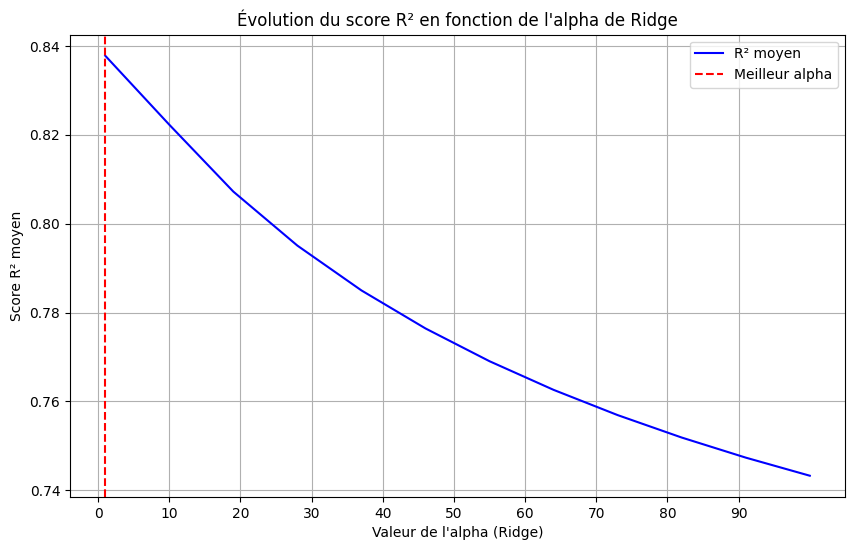

In [ ]:


pipeline = Pipeline([
    ('poly', PolynomialFeatures(interaction_only=True)),  # Transformation polynomiale
    ('ridge', Ridge(random_state=42))  # Modèle Ridge
])

param_grid = {
        "ridge__alpha": np.linspace(1, 100,12),
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="r2",
)

grid_search.fit(X_train,y_train)

print(grid_search.best_params_, grid_search.best_score_,grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['param_ridge__alpha'])

results = grid_search.cv_results_
alphas = results["param_ridge__alpha"].data
mean_scores = results["mean_test_score"]


plt.figure(figsize=(10, 6))
plt.plot(alphas, mean_scores, label="R² moyen", color="blue")

#Ajouter des annotations

plt.axvline(grid_search.best_params_["ridge__alpha"], color="red", linestyle="--", label="Meilleur alpha")
plt.xlabel("Valeur de l'alpha (Ridge)")
plt.ylabel("Score R² moyen")
plt.title("Évolution du score R² en fonction de l'alpha de Ridge")
plt.legend()
plt.grid(True)
plt.xticks(np.arange(0,100,10))
plt.show()


In [ ]:
pipeline.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(interaction_only=True)),
  ('elasticnet', ElasticNet(random_state=42))],
 'transform_input': None,
 'verbose': False,
 'poly': PolynomialFeatures(interaction_only=True),
 'elasticnet': ElasticNet(random_state=42),
 'poly__degree': 2,
 'poly__include_bias': True,
 'poly__interaction_only': True,
 'poly__order': 'C',
 'elasticnet__alpha': 1.0,
 'elasticnet__copy_X': True,
 'elasticnet__fit_intercept': True,
 'elasticnet__l1_ratio': 0.5,
 'elasticnet__max_iter': 1000,
 'elasticnet__positive': False,
 'elasticnet__precompute': False,
 'elasticnet__random_state': 42,
 'elasticnet__selection': 'cyclic',
 'elasticnet__tol': 0.0001,
 'elasticnet__warm_start': False}

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(interaction_only=True)),  # Transformation polynomiale
    ('elasticnet', ElasticNet(random_state=42))
  # Modèle ElasticNet
])

param_grid = {
        "elasticnet__alpha": np.linspace(1, 100, 20),
        "elasticnet__l1_ratio": np.linspace(0, 1, 20)
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring="r2",
)

grid_search.fit(X_test,y_test)

print(grid_search.best_params_)


c:\Users\DELL 7490\Desktop\Projet data\Assur_aimant\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.761e+09, tolerance: 2.236e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
c:\Users\DELL 7490\Desktop\Projet data\Assur_aimant\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.595e+09, tolerance: 2.284e+06 Linear regression models with null weight for the l1 regularization term are more effici

{'elasticnet__alpha': np.float64(89.57894736842105), 'elasticnet__l1_ratio': np.float64(1.0)}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Récupération des résultats de la grille de recherche
results = grid_search.cv_results_

# Extraction des valeurs des paramètres et des scores moyens
alphas = results["param_elasticnet__alpha"].data
l1_ratios = results["param_elasticnet__l1_ratio"].data
mean_scores = results["mean_test_score"]

# Reshape des données pour former une grille
# Nous devons reshaper les résultats pour qu'ils correspondent à la structure de la grille alpha x l1_ratio
# np.unique(alphas) et np.unique(l1_ratios) nous donnent les valeurs uniques de alpha et l1_ratio respectivement
alpha_values = np.unique(alphas)
l1_ratio_values = np.unique(l1_ratios)

# Créer une matrice des scores moyens
score_matrix = np.array(mean_scores).reshape(len(l1_ratio_values), len(alpha_values))

# Créer une heatmap avec seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(score_matrix, 
            xticklabels=alpha_values, 
            yticklabels=l1_ratio_values, 
            cmap="viridis", 
            annot=True, 
            fmt=".3f",  # Format d'affichage des scores
            cbar_kws={'label': 'R²'},  # Légende de la barre de couleur
            annot_kws={"size": 10})  # Taille du texte sur la heatmap

# Ajouter des labels aux axes
plt.xlabel('Alpha')
plt.ylabel('L1 Ratio')
plt.title('Heatmap des scores moyens de GridSearchCV (R²)')

# Afficher la figure
plt.tight_layout()
plt.show()

ValueError: cannot reshape array of size 1200 into shape (20,20)

In [ ]:
cat_region = [0,0,0,1]
imc_cat = [0,1,0,0,0]



In [ ]:
imc_cat[:]

[[0, 1, 0, 0, 0]]

In [ ]:


test_personne = [25,0,1,1]
for element in cat_region:
    test_personne.append(element)
for element in imc_cat:
    test_personne.append(element)

print(len(test_personne))
nom_colonnes = df_2.drop(['charges', 'bmi'],axis = 1).columns
print(nom_colonnes.shape)
df_test = pd.DataFrame([test_personne], columns=nom_colonnes)
df_test

13
(13,)


,age,children,sex_encode,smoker_encode,northeast,northwest,southeast,southwest,Sous-poids,Poids normal,Surpoids,Obésité,Obésité sévère
0,25,0,1,1,0,0,0,1,0,1,0,0,0
